# Telco Customer Churn

In [28]:
# set task name
task_name = 'telco_churn-v2'

# load common
%run common.ipynb

Cortex Python SDK v6.2.0
Cortex Discovery Libraries v3.5.14


## ML Discovery

In [29]:
from ds_discovery import Wrangle, FeatureCatalog, ModelsBuilder, Commons

In [31]:
ml = ModelsBuilder.from_memory()

In [32]:
Wrangle.from_env(task_name).get_persist_contract().uri

'/Users/lkrishna/git/cortex-fabric-examples/notebooks/telco-churn-v2/hadron/meta/telco_churn-v2/data/Telco-Customer-Churnwrangle.parquet'

In [33]:
uri = Wrangle.from_env(task_name).get_persist_contract().uri
ml.set_source_uri(uri=uri)
ml.pm_persist()

In [34]:
df_ml = ml.load_source_canonical().drop(['CustomerID'], axis=1)
df_ml.shape

(1000, 1427)

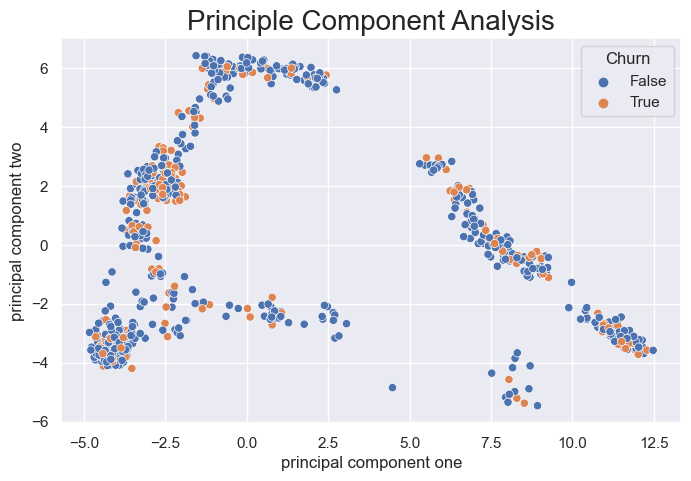

<Figure size 800x500 with 0 Axes>

In [35]:
headers = Commons.filter_headers(df_ml, headers='Churn', drop=True)
ml.visual.show_pca(df_ml, headers=headers, hue='Churn')

In [36]:
fc = FeatureCatalog.from_memory()

In [37]:
df_ml.shape

(1000, 1427)

In [38]:
df_c = fc.intent_model.select_classifier_shuffled(df_ml, target='Churn')
df_c.columns.to_list()

['City_Moss Landing',
 'Avg_Monthly_GB_Download',
 'Churn_Reason_Competitor had better devices',
 'TotalCharges',
 'City_Brooks',
 'Zip_Code',
 'Lat_Long_33.571259, -117.731917',
 'City_Wrightwood',
 'Total_Extra_Data_Charges',
 'Satisfaction_Score',
 'Lat_Long_40.426679, -121.850421',
 'SeniorCitizen',
 'CLTV',
 'Lat_Long_32.847336, -116.997605',
 'City_Santa Fe Springs',
 'Lat_Long_33.634626, -117.874882',
 'Lat_Long_32.99356, -117.207121',
 'Lat_Long_33.719869, -117.907063',
 'City_Alameda',
 'Churn',
 'Avg_Monthly_Long_Distance_Charges']